# Regression on California housing price dataset (tabular data)


## Evaluation by 5-fold cross validation

In [3]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import scale, minmax_scale
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

from gpx import GPXRegressor

X, y = map(lambda x: scale(x), fetch_california_housing(return_X_y=True))
X, y = X[:1000], y[:1000]  # Use a subset for a quick experiment

# cross validate
kf = KFold(n_splits=5, shuffle=True, random_state=0)
scores = []
for i, (train_indices, test_indices) in enumerate(kf.split(X, y)):
    X_tr, X_te = X[train_indices], X[test_indices]
    y_tr, y_te = y[train_indices], y[test_indices]
    Z_tr, Z_te = X_tr, X_te

    model = GPXRegressor(verbose=False).fit(X_tr, y_tr, Z_tr)
    y_mean, y_cov, w_mean, w_cov = model.predict(X_te, Z_te, return_weights=True)
    mse = mean_squared_error(y_te, y_mean)
    scores.append(mse)
    print("Fold {}: test MSE = {}".format(i, mse))
print("Avg. MSE = {} (S.D. = {})".format(np.mean(scores), np.std(scores)))

Fold 0: test MSE = 0.308106460398501
Fold 1: test MSE = 0.15165243121111743
Fold 2: test MSE = 0.19990614196925624
Fold 3: test MSE = 0.165282901644986
Fold 4: test MSE = 0.1508940922820767
Avg. MSE = 0.19516840550118747 (S.D. = 0.059202109018186955)


## Visualization of weights with uncertainty

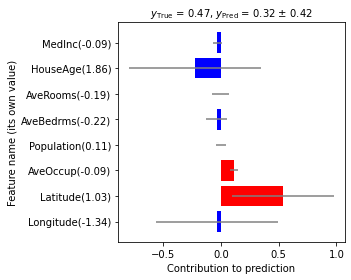

In [10]:
import matplotlib.pyplot as plt

def visualize(z, y_gt, Ey, Vy, Ew, Vw, features):
    fig = plt.figure(figsize=(5, 4), tight_layout=True)

    width = Ew * z
    xerr = np.sqrt(z**2 * np.diag(Vw))
    color = np.where(width >= 0, "red", "blue")
    yticks = ["{0}({1:0.2f})".format(name, z[idx]) for idx, name in enumerate(features)]
    y_index = range(len(yticks) - 1, -1, -1)
    y_conf = np.sqrt(Vy)
    plt.barh(y_index, width, xerr=xerr, color=color, ecolor="grey")
    plt.yticks(y_index, yticks)
    plt.title(
        "$y_\mathrm{{True}}$ = {0:0.2f}, $y_\mathrm{{Pred}}$ = {1:0.2f} $\pm$ {2:0.2f}".format(y_gt, Ey, y_conf),
        fontdict={"fontsize": "medium"})
    plt.xlabel("Contribution to prediction")
    plt.ylabel("Feature name (its own value)")
    plt.show()

features = fetch_california_housing().feature_names
visualize(Z_te[0], y_te[0], y_mean[0], y_cov[0, 0], w_mean[0], w_cov[0], features)